Temperature Analysis and Machine Learning Prediction
By Judah Kerr

In [1]:
# %load main.py
"""
Created on Mon Jan 22 12:47:29 2024

@author: Judah
"""
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn import linear_model
pd.options.mode.copy_on_write = True 

import warnings

# Suppress specific sklearn warning
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

# Initialize the linear regression model at the top level
reg = linear_model.LinearRegression()


def load_data(filepath):
    """Load and return the temperature dataset."""
    return pd.read_csv(filepath)

def clean_data(df, temp_column='AverageTemperature'):
    """Clean the dataset by removing rows with missing values in the specified temperature column."""
    return df.dropna(subset=[temp_column])


def filter_city_data(df, city_name, start_year=1800):
    """Filter data for a specific city and starting from a given year."""
    city_data = df[df['City'] == city_name].copy()
    city_data['dt'] = pd.to_datetime(city_data['dt'])
    city_data['year'] = city_data['dt'].dt.year
    return city_data[city_data['year'] >= start_year]

def filter_country_data(df, country_name, start_year=1825):
    """Filter data for a specific country and starting from a given year."""
    country_data = df[df['Country'] == country_name].copy()
    country_data['dt'] = pd.to_datetime(country_data['dt'])
    country_data['year'] = country_data['dt'].dt.year
    return country_data[country_data['year'] >= start_year]

def convert_celsius_to_fahrenheit(df, temp_column):
    """Convert temperatures from Celsius to Fahrenheit in the specified column."""
    df[temp_column] = df[temp_column].apply(lambda x: (x * 9/5) + 32)
    return df  



def calculate_yearly_averages(df, temp_column='AverageTemperature'):
    """Calculate yearly average temperatures for a specified column."""
    yearly_avg_temp = df.groupby('year')[temp_column].mean().reset_index()
    Q1 = yearly_avg_temp[temp_column].quantile(0.25)
    Q3 = yearly_avg_temp[temp_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return yearly_avg_temp[(yearly_avg_temp[temp_column] >= lower_bound) & (yearly_avg_temp[temp_column] <= upper_bound)]


def add_moving_average(df, temp_column='AverageTemperature', window_size=12):
    """Add a moving average column to the DataFrame."""
    df['MovingAverage'] = df[temp_column].rolling(window=window_size).mean()
    return df


def plot_temperature_trends(df, title, future_years=None, future_temps=None, temp_column='AverageTemperature'):
    """Plot the temperature trends, moving average, and predictions."""
    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df[temp_column], linestyle='-', label='Yearly Avg Temp F°')
    plt.plot(df['year'], df['MovingAverage'], linestyle='-', color='red', label='Moving Avg')
    
    # Plot predictions if future data is provided
    if future_years is not None and future_temps is not None:
        plt.plot(future_years.flatten(), future_temps, linestyle='--', color='green', label='Predicted Temp')
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Average Temperature F°')
    plt.legend()
    plt.show()

# Function to update plot based on the selected year range
def update_plot(year_range):
    start_year, end_year = year_range
    extended_years_df = pd.DataFrame(np.arange(start_year, end_year + 1), columns=['year'])
    extended_temps = reg.predict(extended_years_df)
    plt.figure(figsize=(10, 6))
    
    plt.plot(existing_years, existing_temps, label='Actual Data')
    plt.plot(extended_years_df['year'], extended_temps, linestyle='--', label='Predicted Data')
    plt.title('Temperature Predictions')
    plt.xlabel('Year')
    plt.ylabel('Temperature F°')
    plt.legend()
    plt.show()

In [2]:
def US(selected_year):
    global reg
    # Load and clean the data
    filepath = 'csv/US_yearly_avg_with_moving_avg.csv'
    df = load_data(filepath)

    # Ensure the data is ready for fitting the model
    # Assuming 'year' and 'AverageTemperature' are columns in your df
    X = df[['year']].values  # Feature matrix
    y = df['AverageTemperature'].values  # Target vector

    # Fit the regression model on the data
    reg.fit(X, y)

    # Predict using the model for the range from 1850 to the selected_year
    extended_years = np.arange(1850, selected_year + 1).reshape(-1, 1)
    extended_temps = reg.predict(extended_years)

    # Plot the results
    plot_temperature_trends(df, 'Yearly Average Temperature in the United States', extended_years, extended_temps, 'AverageTemperature')

# Create a slider for selecting the endpoint year for the US data and display it using interactive
style = {'description_width': 'initial'}
us_year_slider = widgets.IntSlider(value=2025, min=1855, max=2200, step=5, description='Select End Year:', style=style)
display(widgets.interactive(US, selected_year=us_year_slider))


interactive(children=(IntSlider(value=2025, description='Select End Year:', max=2200, min=1855, step=5, style=…

Here we have the Average Temperature of the United States as a whole.
The data starts from the year 1850 and ends in 2013.
You can drag the slider to see what the Linear Regression model predicts the temperature will be at any year up to 2200.

In [3]:
 def Global(selected_year):
    global reg
    filepath = 'csv/Global_ReducedFile.csv'
    df = load_data(filepath)
    
    # Clean data
    #df_cleaned = clean_data(df, 'LandAverageTemperature')
    
    # Convert temperatures from Celsius to Fahrenheit
    #df_converted = convert_celsius_to_fahrenheit(df_cleaned, 'LandAverageTemperature')
    
    # Convert 'dt' to datetime and extract the year
    #df_cleaned['dt'] = pd.to_datetime(df_cleaned['dt'])
    #df_cleaned['year'] = df_cleaned['dt'].dt.year
    
    # Filter data from 1825 onwards
    #Global_data = df_cleaned[df_cleaned['year'] >= 1850]
    
    # Calculate yearly averages and add moving average
    #Global_yearly_avg = calculate_yearly_averages(Global_data, 'LandAverageTemperature')
    #Global_yearly_avg_with_moving_avg = add_moving_average(Global_yearly_avg, 'LandAverageTemperature', 12)
 
    # Train the linear regression model
    #reg.fit(Global_yearly_avg_with_moving_avg[['year']], Global_yearly_avg_with_moving_avg['LandAverageTemperature'])
    
     # Predict using the model
    extended_years = np.arange(1850, selected_year + 1).reshape(-1, 1) 
    extended_temps = reg.predict(extended_years)

    # Save the DataFrame to a new CSV file
    #save_path = 'csv/Global_ReducedFile.csv'  # Specify your desired path
    #Global_yearly_avg_with_moving_avg.to_csv(save_path, index=False)
    #print(f"Data saved to {save_path}")

    # Plot the results
    plot_temperature_trends(df, 'Yearly Average Temperature on Earth', extended_years, extended_temps, 'LandAverageTemperature')

# Create a slider for selecting the endpoint year for Global
style = {'description_width': 'initial'}
global_year_slider = widgets.IntSlider(value=2025, min=1855, max=2200, step=5, description='Select End Year:', style=style)
display(widgets.interactive(Global, selected_year=us_year_slider))   


interactive(children=(IntSlider(value=2025, description='Select End Year:', max=2200, min=1855, step=5, style=…

This is the Average Land Temperature of the Earth.
The data starts from the year 1850 and ends in 2013.

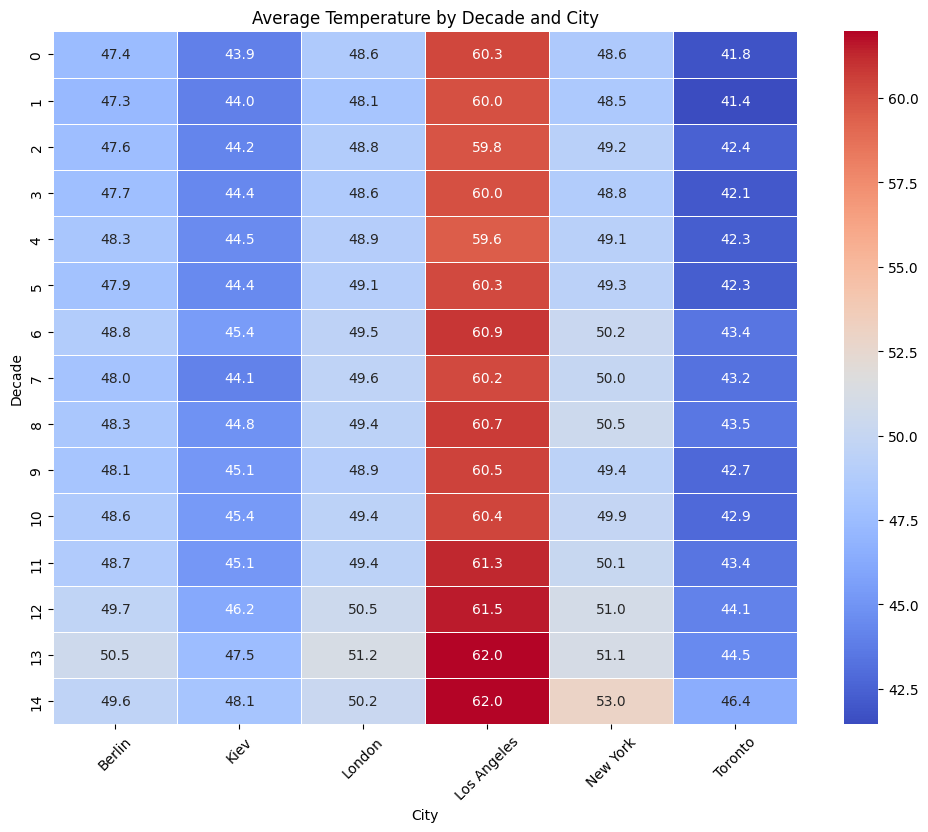

In [4]:
# Load, clean, and convert temperature data
filepath = 'csv/MajorCity_ReducedFile.csv'
df = load_data(filepath)
#df_cleaned = clean_data(df, 'AverageTemperature')
#df_converted = convert_celsius_to_fahrenheit(df_cleaned, 'AverageTemperature')

# Extract the year from the 'dt' column and create a 'decade' column
#df_converted['year'] = pd.to_datetime(df_converted['dt']).dt.year
#df_converted = df_converted[df_converted['year'] >= 1870]
#df_converted['decade'] = (df_converted['year'] // 10) * 10  # Integer division to get the decade

# Filter for cities of interest
#cities_of_interest = ['Berlin', 'Toronto', 'Kiev', 'London', 'New York', 'Los Angeles']
#df_filtered = df_converted[df_converted['City'].isin(cities_of_interest)]

# Group by decade and city, then calculate the average temperature
#df_grouped = df_filtered.groupby(['decade', 'City'])['AverageTemperature'].mean().reset_index()

# Pivot the grouped DataFrame for heatmap data
#heatmap_data = df_grouped.pivot(index="decade", columns="City", values="AverageTemperature")

# Save the DataFrame to a new CSV file
#save_path = 'csv/MajorCity_ReducedFile.csv'  # Specify your desired path
#heatmap_data.to_csv(save_path, index=False)
#print(f"Data saved to {save_path}")

# Create the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)

plt.title('Average Temperature by Decade and City')
plt.ylabel('Decade')
plt.xlabel('City')
plt.xticks(rotation=45) 
plt.show()

Here we have a Heatmap of different cities in the World, grouped by Decade starting from 1870 and going to 2010.


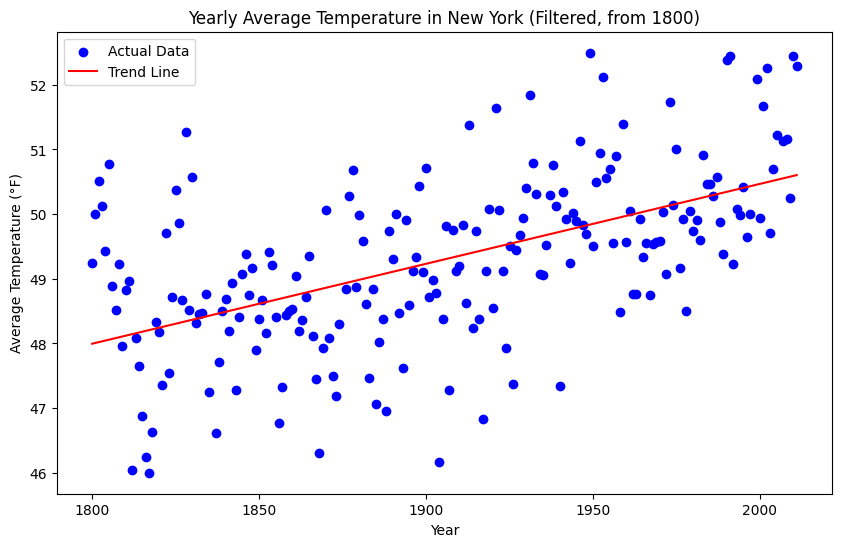

In [5]:
# Main analysis for New York

global reg
filepath = 'csv/MajorCityNewYork_ReducedFile.csv'
df = load_data(filepath)

#df_cleaned = clean_data(df, 'AverageTemperature') 
#df_converted = convert_celsius_to_fahrenheit(df_cleaned, 'AverageTemperature')
#newYork_data = filter_city_data(df_converted, 'New York', 1800)

#newYork_yearly_avg = calculate_yearly_averages(newYork_data, 'AverageTemperature')
#newYork_yearly_avg_with_moving_avg = add_moving_average(newYork_yearly_avg, 'AverageTemperature', 12)

# Save the DataFrame to a new CSV file
#save_path = 'csv/MajorCityNewYork_ReducedFile.csv'  # Specify your desired path
#newYork_yearly_avg_with_moving_avg.to_csv(save_path, index=False)
#print(f"Data saved to {save_path}")

reg = linear_model.LinearRegression()
X = df[['year']]
y = df['AverageTemperature']
reg.fit(X, y)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

# Regression line
extended_years = np.arange(X['year'].min(), X['year'].max() + 1).reshape(-1, 1)
extended_temps = reg.predict(extended_years)
plt.plot(extended_years, extended_temps, color='red', label='Trend Line')

plt.title('Yearly Average Temperature in New York (Filtered, from 1800)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.show()

Here is a scatter plot of the Yearly Average Temperature in New York City, from the year 1800 to 2013.
